# 1. 

## 1.a
 leave-one-out - это метод кросс-валидации, при котором число фолдов равно объёму обучающей выборки.
 
 Суть метода: Каждую итерацию выбирается один объект данных, который будет использоваться в качестве тестового набора. Остальные объекты — обучающий набор. Процесс повторяется для каждого объекта выборки, метрики качества усредняются.
 
 Плюсы: нет случайности в разбиении, почти все данные используются для обучения, подходит для маленьких данных, оценка качества близка к истинной.
 
 Минусы: не подходит для больших данных, высокая дисперсия оценки, очень маленькая скорость вычислений


 ## 1.b
 Grid Search (Перебор по сетке) - это метод оптимизации гиперпараметров машинного обучения перебирает все возможные комбинации гиперпараметров из заданного списка.
 
 Плюсы: гарантирует нахождение лучшей комбинации в сетке.
 
 Минусы: высокие вычислительные затраты.

 Randomized Grid Search выбирает фиксированное количество случайных комбинаций из определенного пространства гиперпараметров.
 
 Плюсы: гораздо быстрее, чем поиск по сетке, меньшее количество итераций, хорошо работает с ограниченным числом гиперпараметров.
 
 Минусы: нет гарантии найти наилучшую комбинацию за счет меньшего количества итераций

Bayesian optimization строит вероятностную модель, предсказывающую качество гиперпараметров на основе уже проверенных точек, и итеративно уточняет новые параметры, обновляя предсказания.

Плюсы: эффективнее перебора по сетке и случайного поиска, быстро находит хорошие комбинации параметров, учитывает предыдущие результаты

Минусы: cложнее в реализации, может застревать в локальных оптимумах, вычислительно затратна для очень больших пространств параметров

## 1.c 
Классификация методов отбора признаков: 
- Фильтрационные методы оценивают значимость признаков до обучения модели, используя статистические критерии(дисперсия, корреляция, $X^2$), визуальную оценку. 
- Оберточные методы работают путем итеративного отбора подмножеств признаков, оценивая качество каждого подмножества с помощью модели машинного обучения, пока не будет найдено оптимальное сочетание признаков, максимизирующее производительность.
- Встроенные методы (L1-регуляризация, деревья решений) автоматически выбирают признаки в процессе обучения, штрафуя неважные веса или оценивая важность в узлах.
- Гибридные методы комбинируют фильтрацию и обёртку/встроенный подход, сначала отсеивая слабые признаки, затем настраивая выбор моделью.

Корреляция Пирсона - это статистическая мера, которая оценивает линейную зависимость между двумя непрерывными переменными. Она показывает, насколько изменение одной переменной связано с изменением другой.

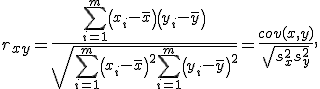

r = 1 — идеальная прямая линейная зависимость (рост X → рост Y),
r = -1 — идеальная обратная линейная зависимость (рост X → падение Y),
r = 0 — отсутствие линейной зависимости (возможна нелинейная связь).

Критерий хи-квадрат (χ²) — это статистический критерий, который используется для проверки гипотез о различиях между наблюдаемыми и ожидаемыми частотами в категориальных данных. Он позволяет оценить, насколько фактические данные соответствуют теоретическим ожиданиям или насколько независимы друг от друга переменные. 

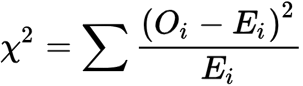

Lasso — это модификация линейной регрессии, которая выполняет две ключевые функции: предотвращает переобучение, штрафуя за большие значения коэффициентов, автоматически обнуляет коэффициенты у менее важных признаков.

${\displaystyle L_{1}=\sum _{i}{(y_{i}-y(t_{i}))}^{2}+\lambda \sum _{i}{|a_{i}|}}.$


Permutation Significance (Перестановочная важность) - это метод для оценки важности признаков в модели машинного обучения. Его основная идея — измерить, насколько упадет качество модели, если мы случайным образом перемешаем значения одного признака, разрушив таким образом связь между ним и целевой переменной.

SHAP (SHapley Additive exPlanations) — это метод интерпретации машинного обучения, который объясняет вклад каждого признака в предсказание.
Этот метод отвечает на вопрос: «Почему модель сделала именно такой прогноз для данного конкретного случая?». Он делает это, присваивая каждому признаку в данных численное значение (SHAP value), которое показывает, насколько и в какую сторону (увеличивая или уменьшая) этот признак повлиял на итоговое предсказание модели по сравнению со средним прогнозом по всему датасету.

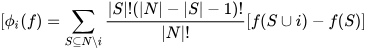

## 2. Introduction

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import scipy as sp
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import PolynomialFeatures
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GroupKFold, StratifiedKFold, TimeSeriesSplit
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_json('train.json')

In [3]:
df['interest_level_enc'] = df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,interest_level_enc
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,1
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,0
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium,1
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,1
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low,0
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium,1
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium,1
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium,1


## Clean the data of outliners

In [4]:
lower = df['price'].quantile(0.01)
upper = df['price'].quantile(0.99)
df = df[(df['price'] > lower) & (df['price'] < upper)]

In [5]:
df_=df.copy()
features= [ 'Elevator', 'Hardwood Floors', 'Cats Allowed', 'Dogs Allowed', 'Doorman', 'Dishwasher', 'No Fee', 'Laundry in Building', 'Fitness Center', 'Pre-War', 'Laundry in Unit', 'Roof Deck', 'Outdoor Space', 'Dining Room', 'High Speed Internet', 'Balcony', 'Swimming Pool', 'Laundry In Building', 'New Construction', 'Terrace']
for feature in features:
    df_[f'{feature}'] = df_['features'].apply(
        lambda x: 1 if feature in x else 0
    )
df_

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,Laundry in Unit,Roof Deck,Outdoor Space,Dining Room,High Speed Internet,Balcony,Swimming Pool,Laundry In Building,New Construction,Terrace
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,0,0,0,1,0,0,0,0,0,0
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,0,0,0,0,0,0,0,0,0,0
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,1,0,0,0,0,0,0,0,0,0
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,0,0,0,0,0,0,0,0,0,0
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,...,0,0,0,0,0,0,0,0,0,0
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,...,0,0,0,0,0,0,0,1,0,0
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,...,1,0,0,1,0,0,0,0,0,0
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,...,1,0,1,0,0,0,0,0,0,0


## 3.a Implement train/test split function. Split the data into two parts randomly with a test_size parameter (ratio from 0 to 1). Return training and test sets.

In [6]:
X=df_[features]
y=df_['price']
def my_train_test_split(X, y, test_size=0.2, random_state=21):
    if (test_size<0 or test_size>1):
        raise ValueError ("test_size должен быть [0;1]")
    np.random.seed(random_state)
    n_samples = len(X)
    test_samples=int(n_samples*test_size)
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:test_samples]
    train_indices= shuffled_indices[test_samples:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices] 
    return X_train, X_test, y_train, y_test
        

In [7]:
X_train, X_test, y_train, y_test=my_train_test_split(X,y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(38675, 20) (9668, 20) (38675,) (9668,)


## 3.b Split the data randomly into 3 parts with validation_size and test_size parameters. Return training, validation and test sets.

In [8]:
X=df_[features]
y=df_['price']
def my_train_val_test_split(X, y, test_size=0.2, validation_size=0.4):
    if (test_size<0 or test_size>1):
        raise ValueError ("test_size должен быть [0;1]")
    if test_size + validation_size >= 1.0:
        raise ValueError("Сумма test_size и validation_size должна быть меньше 1.0")
    n_samples = len(X)
    test_samples=int(n_samples*test_size)
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:test_samples]
    train_val_indices= shuffled_indices[test_samples:]
    val_samples=int(n_samples*validation_size)
    val_indices = shuffled_indices[test_samples:test_samples+val_samples]
    train_indices = shuffled_indices[test_samples+val_samples:]
    X_train, X_val, X_test = X.iloc[train_indices], X.iloc[val_indices], X.iloc[test_indices]
    y_train, y_val, y_test = y.iloc[train_indices], y.iloc[val_indices], y.iloc[test_indices] 
    return X_train, X_val, X_test, y_train, y_val, y_test

In [9]:
X_train, X_val, X_test, y_train, y_val, y_test=my_train_val_test_split(X, y, test_size=0.2, validation_size=0.4)
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(19338, 20) (19337, 20) (9668, 20) (19338,) (19337,) (9668,)


## 3.c Split the data into 2 parts with date_split and test_size parameters. Return training and test sets.

In [10]:
def my_split_by_date(data, date_col, date_split, inclusive=False):
    date_split = pd.to_datetime(date_split)
    data[date_col] = pd.to_datetime(data[date_col])
    if inclusive:
        train = data[data[date_col] <= date_split]
        test = data[data[date_col] > date_split]
    else:
        train = data[data[date_col] < date_split]
        test = data[data[date_col] >= date_split]
    return train, test

## 3.d Split the data into 3 parts with validation_date and test_date parameters. Return training, validation and test sets.

In [11]:
def my_split_by_date_val (validation_date,test_date, data, date_col,inclusive=False):
    data[date_col]=pd.to_datetime(data[date_col])
    validation_date=pd.to_datetime(validation_date)
    test_date=pd.to_datetime(test_date)
    train=data[data[date_col]<validation_date]
    validation=data[data[date_col]>=validation_date and data[date_col]<test_date]
    test=data[data[date_col]>=test_date]
    return train,validation,test
    

In [12]:
def train_val_test_split(X, y, test_size=0.2, validation_size=0.4, random_state=21):
    if test_size + validation_size >= 1.0:
        raise ValueError("Сумма test_size и validation_size должна быть меньше 1.0")
    np.random.seed(random_state)
    n_samples = len(X)
    test_samples=int(n_samples*test_size)
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:test_samples]
    train_val_indices= shuffled_indices[test_samples:]
    val_samples=int(n_samples*validation_size)
    val_indices = shuffled_indices[test_samples:test_samples+val_samples]
    train_indices = shuffled_indices[test_samples+val_samples:]
    X_train, X_val, X_test = X.iloc[train_indices], X.iloc[val_indices], X.iloc[test_indices]
    y_train, y_val, y_test = y.iloc[train_indices], y.iloc[val_indices], y.iloc[test_indices] 
    return X_train, X_val, X_test, y_train, y_val, y_test

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test=train_val_test_split(X, y, test_size=0.2, validation_size=0.4)
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(19338, 20) (19337, 20) (9668, 20) (19338,) (19337,) (9668,)


# 4. Реализуйте методы перекрестной проверки:

In [14]:
def my_k_fold_split(X, k=5, shuffle=False, random_state=None):
    indx=  np.arange(len(X))
    if shuffle:
        if random_state is not None:
            np.random.seed(random_state)
        indices = np.random.permutation(indx)
    else:
        indices=indx
    fold_sizes = np.full(k, len(X) // k, dtype=int)
    fold_sizes[:len(X) % k] += 1
    cur=0
    splits = []
    for fold in fold_sizes:
        begin = cur
        end = cur + fold
        test_index = indices[begin:end]
        train_index = np.concatenate([indices[:begin], indices[end:]])
        cur = end
        splits.append((train_index.tolist(), test_index.tolist())) 
        cur = end
    return splits

In [15]:
all_splits =my_k_fold_split(X,shuffle=True, k=5)

In [16]:
def my_group_k_fold_split(X, groups, k=5, shuffle=False, random_state=None):
    unique_groups = np.unique(groups)
    n_groups = len(unique_groups)
    if k > n_groups:
        raise ValueError(
            f"the number of folds={k} greater than the number of groups={n_groups}"
        )
    if shuffle:
        if random_state is not None:
            np.random.seed(random_state)
        unique_groups = np.random.permutation(unique_groups)
    group_fold_indices = defaultdict(list)
    for i, group in enumerate(unique_groups):
        fold_idx = i % k
        group_fold_indices[fold_idx].append(group)
    group_to_indices = defaultdict(list)
    for idx, group in enumerate(groups):
        group_to_indices[group].append(idx)
    splits = []
    train_groups = []
    for fold in range(k):
        test_groups = group_fold_indices[fold]
        train_groups = [
            group for f in group_fold_indices if f != fold 
            for group in group_fold_indices[f]
        ]
        train_indices = []
        for group in train_groups:
            train_indices.extend(group_to_indices[group])  
        test_indices = []
        for group in test_groups:
            test_indices.extend(group_to_indices[group])
        splits.append((train_indices, test_indices))
    return splits

In [17]:
def my_stratified_split(stratify_field, k, shuffle=True, random_state=None):
    if isinstance(stratify_field, (list, np.ndarray)):
        data = np.array(stratify_field)
    elif isinstance(stratify_field, pd.Series):
        data = stratify_field.values
    else:
        data = np.array(stratify_field)
    stratify_field = data.astype(str)
    unique_groups = np.unique(stratify_field)
    groups_indices = defaultdict(list)
    if random_state is not None:
        np.random.seed(random_state)
    for idx, group in enumerate(stratify_field):
        groups_indices[group].append(idx)
    folds = [[] for _ in range(k)]
    for group, indices in groups_indices.items():
        if shuffle:
            np.random.shuffle(indices)
        for i, idx in enumerate(indices):
            folds[i % k].append(idx)
    splits = []
    for i in range(k):
        test_indices = folds[i]
        train_indices = [idx for fold in (folds[:i] + folds[i+1:]) for idx in fold]
        splits.append((train_indices, test_indices))
    return splits


In [18]:
def my_simple_time_split(X, date_field, k=3):
    X = X.copy()
    X[date_field] = pd.to_datetime(X[date_field])
    X = X.sort_values(date_field).reset_index(drop=True)
    indices = X.index.values
    fold_sizes = np.full(k, len(X) // (k+1), dtype=int)
    fold_sizes[:len(X) % k] += 1
    splits = []
    current = fold_sizes[0]
    for fold_size in fold_sizes:
        start = current
        end = current + fold_size
        test_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        splits.append((train_indices.tolist(), test_indices.tolist()))
        current = end
    return splits

# 5. Comparison

In [19]:
X=df_

In [20]:
my_splits =my_k_fold_split(X,shuffle=True, k=3, random_state=21)
kf = KFold(n_splits=3, shuffle=True, random_state=21)
sklearn_splits = list(kf.split(X))

In [21]:
my_train_indices = my_splits[0][0]  
sklearn_train_indices = sklearn_splits[0][0]  

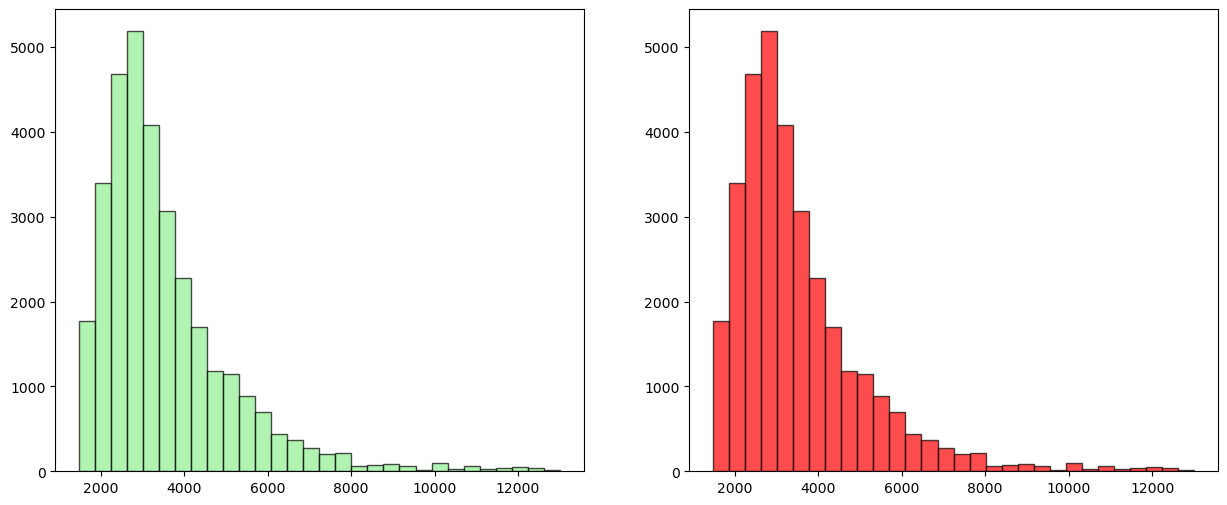

In [22]:
data = X.iloc[my_train_indices]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
data = X.iloc[sklearn_train_indices]
plt.subplot(1, 2, 2)
plt.hist(data['price'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.show()

In [23]:
my_splits=my_group_k_fold_split(X, X['bedrooms'], k=3)
gkf = GroupKFold(n_splits=3)
sklearn_splits = list(gkf.split(X,groups=X['bedrooms']))
my_train_indices = my_splits[0][0]  
sklearn_train_indices = sklearn_splits[0][0]  

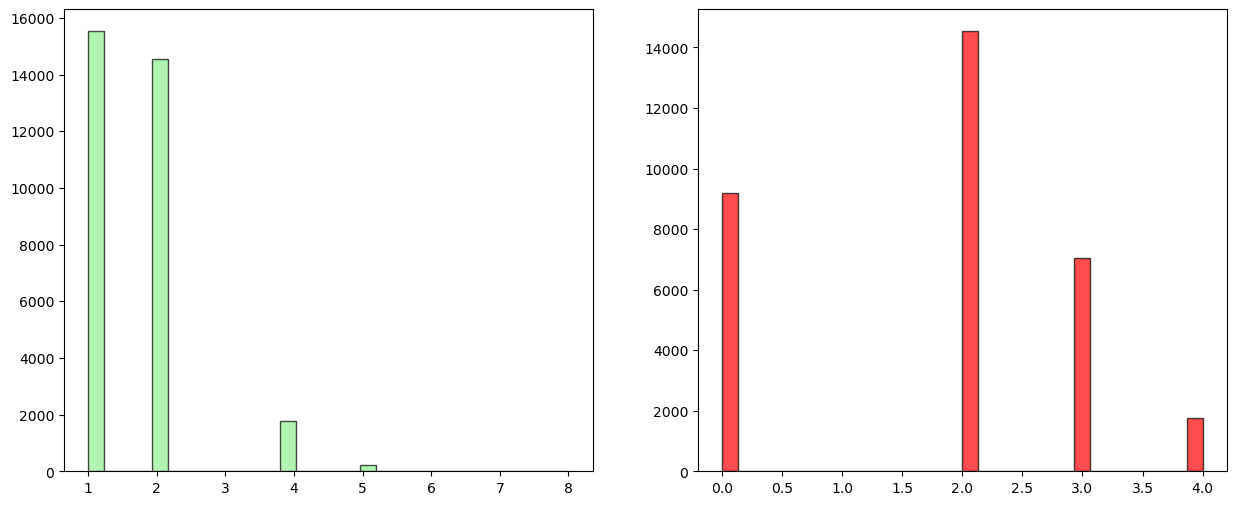

In [24]:
data = X.iloc[my_train_indices]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
data = X.iloc[sklearn_train_indices]
plt.subplot(1, 2, 2)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.show()

In [25]:
my_splits=my_stratified_split(X['bedrooms'], k=5, shuffle=True, random_state=21)
stf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
sklearn_splits = list(stf.split(X,X['bedrooms']))
my_train_indices = my_splits[0][0]  
sklearn_train_indices = sklearn_splits[0][0]  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


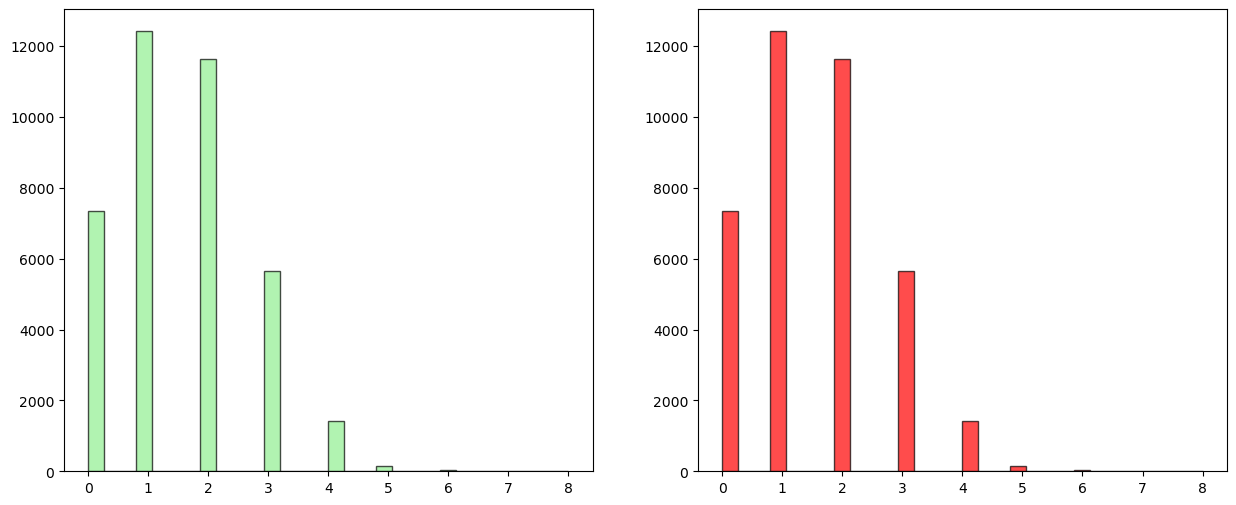

In [26]:
data = X.iloc[my_train_indices]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
data = X.iloc[sklearn_train_indices]
plt.subplot(1, 2, 2)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.show()

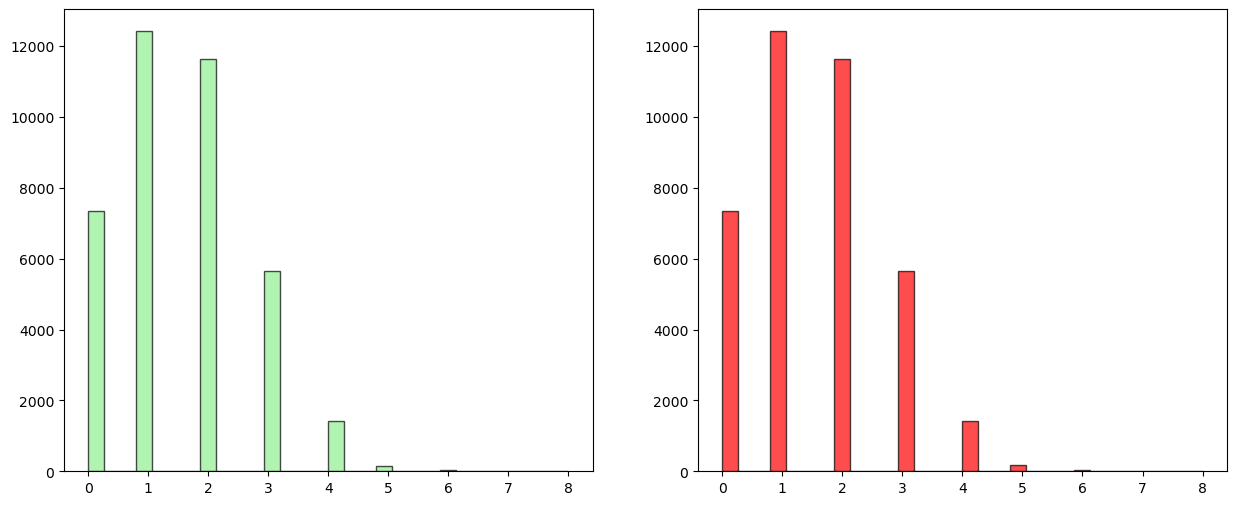

In [27]:
my_train_indices = my_splits[1][0]  
sklearn_train_indices = sklearn_splits[1][0]  
data = X.iloc[my_train_indices]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
data = X.iloc[sklearn_train_indices]
plt.subplot(1, 2, 2)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.show()

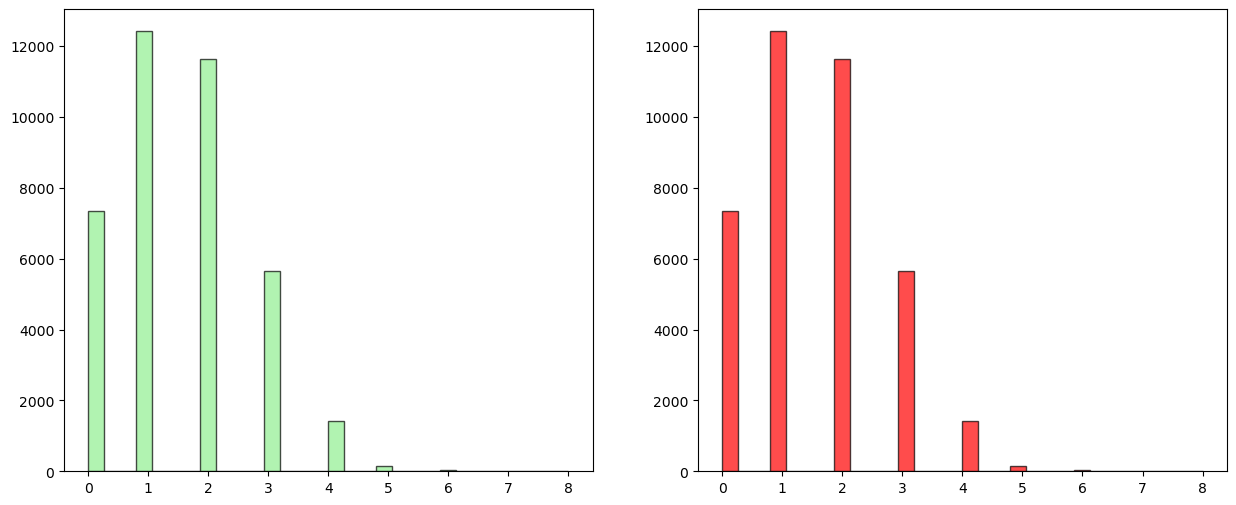

In [28]:
my_train_indices = my_splits[2][0]  
sklearn_train_indices = sklearn_splits[2][0]  
data = X.iloc[my_train_indices]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
data = X.iloc[sklearn_train_indices]
plt.subplot(1, 2, 2)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.show()

In [29]:
my_splits=my_simple_time_split(X, 'created', k=4)
tscv = TimeSeriesSplit(n_splits=4)
sklearn_splits = list(tscv.split(X,'created'))
my_train_indices = my_splits[3][0]  
sklearn_train_indices = sklearn_splits[3][0]  

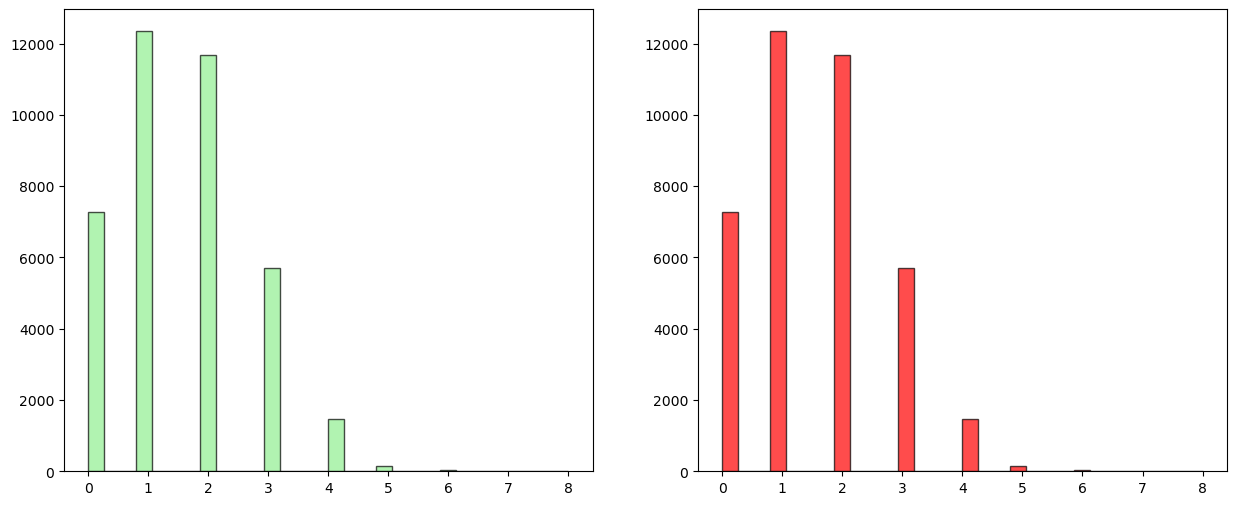

In [30]:
data = X.iloc[my_train_indices]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
data = X.iloc[sklearn_train_indices]
plt.subplot(1, 2, 2)
plt.hist(data['bedrooms'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.show()

In [31]:
my_splits=my_simple_time_split(X, 'created', k=4)
tscv = TimeSeriesSplit(n_splits=4)
sklearn_splits = list(tscv.split(X,'created'))
min_date_first_fold = min(X['created'].iloc[my_splits[0][1]])
max_date_first_fold = max(X['created'].iloc[my_splits[0][1]])
print(min_date_first_fold, max_date_first_fold)

2016-05-01 23:23:38 2016-06-29 21:41:47


In [32]:
min_date_first_fold = min(X['created'].iloc[sklearn_splits[1][1]])
max_date_first_fold = max(X['created'].iloc[sklearn_splits[1][1]])
print(min_date_first_fold, max_date_first_fold)

2016-05-01 22:36:52 2016-05-30 20:46:36


## 5.d 
# Вывод: Выбор стратегии кросс-валидации зависит от распределения целевой переменной. 
- При наличии неравномерного распределения целевой переменной лучше использовать стратифицированную версию для сохранения особенностей соотношения
- В остальных случаях подойдет обычный K-Fold.

# 6

## 6.a Tune a Lasso regression model with normalized features. Employ your method to split the datasets into three parts using fields created in a 60/20/20 ratio - training/validation/test.

In [33]:
features= [ 'bathrooms','bedrooms','interest_level_enc','Elevator', 'Hardwood Floors', 'Cats Allowed', 'Dogs Allowed', 'Doorman', 'Dishwasher', 'No Fee', 'Laundry in Building', 'Fitness Center', 'Pre-War', 'Laundry in Unit', 'Roof Deck', 'Outdoor Space', 'Dining Room', 'High Speed Internet', 'Balcony', 'Swimming Pool', 'Laundry In Building', 'New Construction', 'Terrace']

In [34]:
X=df_[features]
y=df_['price']
X_train, X_val, X_test, y_train, y_val, y_test = my_train_val_test_split(X, y, test_size=0.2, validation_size=0.2)

## 6.b Sort the features by weight coefficients from the model, train the model on the top 10 features and compare the performance.

In [35]:
lasso2=Lasso(alpha=0.0001, random_state=21)
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, test_size=0.2, validation_size=0.2)
scaler_X = StandardScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_test_sc = scaler_X.transform(X_test)
scaler_y = StandardScaler()
y_train_sc = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_sc = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
lasso2.fit(X_train_sc, y_train_sc)
y_pred = lasso2.predict(X_test_sc)
r2 = r2_score(y_test_sc, y_pred)
print(f"R2 with top 10 features: {r2:.4f}")

R2 with top 10 features: 0.6164


In [36]:
X_train, X_val, X_test, y_train, y_val, y_test = my_train_val_test_split(X, y, test_size=0.2, validation_size=0.2)

In [37]:
scaler_X = StandardScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_test_sc = scaler_X.transform(X_test)
scaler_y = StandardScaler()
y_train_sc = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_sc = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [38]:
lasso = Lasso(alpha=0.0001, random_state=21)
lasso.fit(X_train_sc, y_train_sc)

,alpha,0.0001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,21
,selection,'cyclic'


In [39]:
y_pred = lasso.predict(X_test_sc)
r2 = r2_score(y_test_sc, y_pred)
print(f"R2 with top 10 features: {r2:.4f}")

R2 with top 10 features: 0.5915


In [40]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coef': np.abs(lasso.coef_) 
})

coef_df_sorted = coef_df.sort_values('coef', ascending=False)
print(coef_df_sorted)
coef_df_sorted.head(10)['feature'].values
top10_lasso = coef_df_sorted.head(10)['feature'].values
print(top10_lasso)

                feature      coef
0             bathrooms  0.434525
1              bedrooms  0.330149
7               Doorman  0.173409
2    interest_level_enc  0.166249
13      Laundry in Unit  0.098003
3              Elevator  0.065489
10  Laundry in Building  0.057832
11       Fitness Center  0.055788
8            Dishwasher  0.051385
6          Dogs Allowed  0.036278
4       Hardwood Floors  0.033620
9                No Fee  0.033380
17  High Speed Internet  0.032316
20  Laundry In Building  0.027465
16          Dining Room  0.027164
14            Roof Deck  0.019848
5          Cats Allowed  0.019049
22              Terrace  0.018832
21     New Construction  0.017080
15        Outdoor Space  0.016795
12              Pre-War  0.013234
19        Swimming Pool  0.005383
18              Balcony  0.002753
['bathrooms' 'bedrooms' 'Doorman' 'interest_level_enc' 'Laundry in Unit'
 'Elevator' 'Laundry in Building' 'Fitness Center' 'Dishwasher'
 'Dogs Allowed']


In [41]:
X_train_top = X_train.loc[:, top10_lasso]  
X_test_top = X_test.loc[:, top10_lasso]
scaler_top = StandardScaler()
X_train_top_sc = scaler_top.fit_transform(X_train_top)
X_test_top_sc = scaler_top.transform(X_test_top)
model_top = Lasso(alpha=0.0001, random_state=21)
model_top.fit(X_train_top_sc, y_train_sc)
y_pred_top = model_top.predict(X_test_top_sc)
r2_top = r2_score(y_test_sc, y_pred_top)
print(f"R2 with top 10 features: {r2_top:.4f}")
mae =mean_absolute_error(y_test_sc, y_pred_top)
print(f"mae with top 10 features: {mae:.4f}")

R2 with top 10 features: 0.5864
mae with top 10 features: 0.4382


In [42]:
def my_permutation_importance (model, X , y , scoring= None, n_repeats = 5 , random_state = 21 ):
    sc=[]
    np.random.seed(random_state)
    y_pred=model.predict(X)
    if (scoring == None):
        base_score=model.score(X,y)
    if (scoring=='accuracy'):
        base_score = accuracy_score(y, y_pred)
    if (scoring=='r2'):
        base_score = r2_score(y, y_pred)
    if (scoring=='mae'):
        base_score = mean_absolute_error(y, y_pred)
    if (scoring=='rmse'):
        np.sqrt(mean_squared_error(y, y_pred))
    n_features= X.shape[1]
    importances = np.zeros((n_features, n_repeats))
    for n in range (n_features):
        for repeat in range (n_repeats):
            X_cpy=X.copy()
            X_n_values=X[:,n]
            shuf_idxs = np.random.permutation(len(X_n_values))
            X_cpy[:,n] = X_n_values[shuf_idxs]
            y_pred_new = model.predict(X_cpy)
            if scoring is None:
                perturbed_score = model.score(X_cpy, y)
            elif scoring == 'accuracy':
                perturbed_score = accuracy_score(y, y_pred_new)
            elif scoring == 'r2':
                perturbed_score = r2_score(y, y_pred_new)
            elif scoring == 'mae':
                perturbed_score = mean_absolute_error(y, y_pred_new)
            elif scoring == 'rmse':
                perturbed_score = np.sqrt(mean_squared_error(y, y_pred_new))
            importance_value = base_score - perturbed_score
            importances[n, repeat] = abs(importance_value)
    mean_importances = np.mean(importances, axis=1)
    return mean_importances

In [43]:
results=my_permutation_importance (lasso, X_train_sc , y_train_sc , scoring= 'mae', n_repeats = 5 , random_state = 21 )

In [44]:
new_coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coef': results,
})
new_coef_df_sorted=new_coef_df.sort_values('coef',ascending=False)
print(new_coef_df_sorted)
new_coef_df_sorted.head(10)['feature'].values
top10_permutation_imp = new_coef_df_sorted.head(10)['feature'].values
print(top10_permutation_imp)

                feature      coef
0             bathrooms  0.166777
1              bedrooms  0.141795
7               Doorman  0.042834
2    interest_level_enc  0.038488
13      Laundry in Unit  0.013113
3              Elevator  0.006022
10  Laundry in Building  0.005669
8            Dishwasher  0.004629
11       Fitness Center  0.003573
17  High Speed Internet  0.002303
6          Dogs Allowed  0.002036
4       Hardwood Floors  0.001649
20  Laundry In Building  0.001192
9                No Fee  0.000864
5          Cats Allowed  0.000849
14            Roof Deck  0.000804
21     New Construction  0.000652
22              Terrace  0.000582
16          Dining Room  0.000542
15        Outdoor Space  0.000365
12              Pre-War  0.000325
19        Swimming Pool  0.000042
18              Balcony  0.000022
['bathrooms' 'bedrooms' 'Doorman' 'interest_level_enc' 'Laundry in Unit'
 'Elevator' 'Laundry in Building' 'Dishwasher' 'Fitness Center'
 'High Speed Internet']


In [45]:
X_train_top = X_train.loc[:, top10_permutation_imp] 
X_test_top = X_test.loc[:, top10_permutation_imp]
scaler_top = StandardScaler()
X_train_top_sc = scaler_top.fit_transform(X_train_top)
X_test_top_sc = scaler_top.transform(X_test_top)
lasso = Lasso(alpha=0.01, random_state=21)
lasso.fit(X_train_top_sc, y_train_sc)
y_pred_top = lasso.predict(X_test_top_sc)
r2_top = r2_score(y_test_sc, y_pred_top)
print(f"R2 with top 10 features: {r2_top:.4f}")

R2 with top 10 features: 0.5865


In [46]:
mae_top =mean_absolute_error(y_test_sc, y_pred_top)
print(f"mae with top 10 features: {mae_top:.4f}")

mae with top 10 features: 0.4368


## 6.c Implement a basic feature selection method based on the ratio of missing values in features and correlation. Apply this method to the feature set, select the top 10 features, retrain the model and evaluate the performance.

In [47]:
def my_simple_feature_selection(X, y, nan_threshold=0.5, cor_threshold=0.9, top_n=10):
    nan_ratios = X.isnull().mean() 
    features = nan_ratios[nan_ratios <= nan_threshold].index.tolist()
    X_filtered = X[features]
    corr_matrix = X_filtered.corr().abs() 
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    upper_triangle = corr_matrix.where(mask)
    to_drop = []
    for column in upper_triangle.columns:
        high_corr = upper_triangle[column] > cor_threshold
        if high_corr.any():
            to_drop.append(column)
    uncor_features = [col for col in X_filtered.columns if col not in to_drop]
    X_uncor = X_filtered[uncor_features]
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X_uncor)
    lasso = Lasso(alpha=0.0001, random_state=21)
    lasso.fit(X_sc, y)
    importance = abs(lasso.coef_)
    sort_idxs = np.argsort(importance)[::-1]
    sort_features = [uncor_features[i] for i in sort_idxs]
    sort_importance = importance[sort_idxs]
    top_features = sort_features[:top_n]
    top_importance = sort_importance[:top_n]
    return X[top_features], top_features

In [48]:
X_train, features = my_simple_feature_selection(X_train,  y_train,nan_threshold=0.5,    cor_threshold=0.9,top_n=10 )

In [49]:
features

['bathrooms',
 'bedrooms',
 'Doorman',
 'interest_level_enc',
 'Laundry in Unit',
 'Elevator',
 'Laundry in Building',
 'Fitness Center',
 'Dishwasher',
 'Hardwood Floors']

In [50]:
X_train_sel = X_train.loc[:, features]  
X_test_sel = X_test.loc[:, features]
scaler_top = StandardScaler()
X_train_top_sc = scaler_top.fit_transform(X_train_top)
X_test_top_sc = scaler_top.transform(X_test_top)
model_top = Lasso(alpha=0.01, random_state=21)
model_top.fit(X_train_top_sc, y_train_sc)
y_pred_top = model_top.predict(X_test_top_sc)
r2_top = r2_score(y_test_sc, y_pred_top)
print(f"R2 with top 10 features: {r2_top:.4f}")
mae =mean_absolute_error(y_test_sc, y_pred_top)
print(f"mae with top 10 features: {mae:.4f}")

R2 with top 10 features: 0.5865
mae with top 10 features: 0.4368


## 6.f Use SHAP and retrain the model using the top 10 most important features.

In [51]:
lasso = Lasso(alpha=0.0001, random_state=21)
lasso.fit(X_train_sc, y_train_sc)

,alpha,0.0001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,21
,selection,'cyclic'


In [52]:
explainer = shap.Explainer(lasso, X_train_sc)

In [53]:
shap_values = explainer(X_train_sc)

In [54]:
importance_values = np.abs(shap_values.values).mean(axis=0)
top_10_shap = np.argsort(importance_values)[::-1][:10].tolist()
feature_names = X_train.columns.tolist()
n_features = len(feature_names)
valid_indices = [i for i in top_10_shap if i < n_features]
top_features = [feature_names[i] for i in valid_indices]
X_train_top = X_train[top_features] 
X_test_top = X_test[top_features]
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train_top)
X_test_scaled = scaler_x.transform(X_test_top)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
lasso_top = Lasso(alpha=0.0001, random_state=21)
lasso_top.fit(X_train_scaled, y_train_scaled)
y_pred = lasso_top.predict(X_test_scaled)
r2 = r2_score(y_test_scaled, y_pred)
print(f"R2 with top 10 features: {r2:.4f}")

R2 with top 10 features: 0.5767


In [55]:
mae_top =mean_absolute_error(y_test_scaled, y_pred)
print(f"mae with top 10 features: {mae_top:.4f}")

mae with top 10 features: 0.4450


# 7. Hyperparameter optimization

## 7.a Implement grid search and randomized search methods for tuning alpha and l1_ratio parameters in sklearn's ElasticNet model.

In [56]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, test_size=0.2, validation_size=0.2)

In [57]:
def my_elasticnet_grid_search(X_train, y_train, X_test, y_test):
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    y_train_sc = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_sc = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
    X_train_sc = scaler_x.fit_transform(X_train)
    X_test_sc = scaler_x.transform(X_test)
    alpha_values = np.logspace(-4, 2, 20)    
    l1_ratio_values = np.linspace(0, 1, 11)  
    results = []
    best_mae = float('inf')
    best_r2=-float('inf')
    best_params = None
    best_model = None
    for i, alpha in enumerate(alpha_values):
        for j, l1_ratio in enumerate(l1_ratio_values):
            model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,random_state=21, max_iter=100)
            model.fit(X_train_sc, y_train_sc)
            y_pred = model.predict(X_test_sc)
            mae = mean_absolute_error(y_test_sc, y_pred)
            r2 = r2_score(y_test_sc, y_pred)
            results.append({
                'alpha': alpha,
                'l1_ratio': l1_ratio,
                'mae': mae,
                'r2': r2
            })
            if mae < best_mae:
                best_mae = mae
                best_r2=r2
                best_params = {'alpha': alpha, 'l1_ratio': l1_ratio}
                best_model = model
    return best_params, best_mae, best_r2, best_model

## 7.b Find the best combination

In [58]:
best_params, best_mae, best_r2, best_model = my_elasticnet_grid_search(X_train, y_train, X_test, y_test)
y_pred_best = best_model.predict(X_test_sc)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.761e+03, tolerance: 2.901e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.762e+03, tolerance: 2.901e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

In [59]:
print(f"best parameters:{best_params}")

best parameters:{'alpha': 0.01623776739188721, 'l1_ratio': 0.30000000000000004}


In [60]:
print(f"best mae:{best_mae:.4f}, best r2:{best_r2:.4f}")

best mae:0.4325, best r2:0.6154


In [61]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
y_train_sc = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_sc = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
X_train_sc = scaler_x.fit_transform(X_train)
X_test_sc = scaler_x.transform(X_test)

## 7.c Use optuna and check its perfomance on the ElasticNet model

In [62]:
import optuna
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.00001, 1.0, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    model = ElasticNet( alpha=alpha,l1_ratio=l1_ratio,random_state=21,max_iter=100)
    kf = KFold(n_splits=5, shuffle=True, random_state=21)
    scores = cross_val_score(model, X_train_sc, y_train_sc, cv=kf, scoring='r2')
    return scores.mean()


In [63]:
study_r2 = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=21))
study_r2.optimize(objective, n_trials=100)

[I 2025-09-06 19:19:40,335] A new study created in memory with name: no-name-ed26360b-d641-4d33-bbea-6e3dde166784
[I 2025-09-06 19:19:40,539] Trial 0 finished with value: 0.6018196867971118 and parameters: {'alpha': 1.752364328661882e-05, 'l1_ratio': 0.28910965978981684}. Best is trial 0 with value: 0.6018196867971118.
[I 2025-09-06 19:19:40,591] Trial 1 finished with value: 0.6013017720035734 and parameters: {'alpha': 0.04025610332737186, 'l1_ratio': 0.021616249915949792}. Best is trial 0 with value: 0.6018196867971118.
[I 2025-09-06 19:19:40,797] Trial 2 finished with value: 0.601819833808988 and parameters: {'alpha': 0.00010705669362001624, 'l1_ratio': 0.0507732566953768}. Best is trial 2 with value: 0.601819833808988.
[I 2025-09-06 19:19:40,956] Trial 3 finished with value: 0.6018174005140321 and parameters: {'alpha': 0.00032460818758110624, 'l1_ratio': 0.6639102946247}. Best is trial 2 with value: 0.601819833808988.
[I 2025-09-06 19:19:41,105] Trial 4 finished with value: 0.601817

In [64]:
print(f"best parameters for R2: {study_r2.best_params}")
print(f"best R2: {study_r2.best_value:.4f}")

best parameters for R2: {'alpha': 0.0008038512604032553, 'l1_ratio': 0.04120749026614079}
best R2: 0.6018


In [65]:
model = ElasticNet(alpha=best_params['alpha'],l1_ratio=best_params['l1_ratio'],random_state=21,max_iter=100)
model.fit(X_train_sc, y_train_sc)
y_pred = model.predict(X_test_sc)
r2 = r2_score(y_test_sc, y_pred)

In [66]:
print(f"R2 : {r2:.4f}")

R2 : 0.6154


## 7.d Use optuna to check one of your cross-validation methods

In [67]:
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.00001, 1.0, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,random_state=21, max_iter=100 )
    cv=my_k_fold_split(X_train_sc, k=5, shuffle=True, random_state=21)
    scores = cross_val_score(model, X_train_sc, y_train_sc, cv=cv,scoring='r2')  
    return scores.mean()
study_r2 = optuna.create_study(direction='maximize')
study_r2.optimize(objective, n_trials=100)

[I 2025-09-06 19:19:54,472] A new study created in memory with name: no-name-7fcb7445-8bef-4f24-b7f7-6a84c9502695
[I 2025-09-06 19:19:54,739] Trial 0 finished with value: 0.6018197141812727 and parameters: {'alpha': 3.9121481917204324e-05, 'l1_ratio': 0.3995057325579008}. Best is trial 0 with value: 0.6018197141812727.
[I 2025-09-06 19:19:54,821] Trial 1 finished with value: 0.5963748039865785 and parameters: {'alpha': 0.017822213059649695, 'l1_ratio': 0.8990194359812281}. Best is trial 0 with value: 0.6018197141812727.
[I 2025-09-06 19:19:55,048] Trial 2 finished with value: 0.6018196821511097 and parameters: {'alpha': 1.946209004206423e-05, 'l1_ratio': 0.809029993742144}. Best is trial 0 with value: 0.6018197141812727.
[I 2025-09-06 19:19:55,118] Trial 3 finished with value: 0.6016557684035003 and parameters: {'alpha': 0.006782411899881096, 'l1_ratio': 0.29953427354865914}. Best is trial 0 with value: 0.6018197141812727.
[I 2025-09-06 19:19:55,331] Trial 4 finished with value: 0.6018

In [68]:
print(f"best parameters for R2: {study_r2.best_params}")
print(f"best R2: {study_r2.best_value:.4f}")

best parameters for R2: {'alpha': 0.0023187729664264157, 'l1_ratio': 0.0026876094600364582}
best R2: 0.6018


In [69]:
model = ElasticNet(alpha=best_params['alpha'],l1_ratio=best_params['l1_ratio'],random_state=21,max_iter=100)
model.fit(X_train_sc, y_train_sc)
y_pred = model.predict(X_test_sc)
r2 = r2_score(y_test_sc, y_pred)

In [70]:
print(f"R2 : {r2:.4f}")

R2 : 0.6154
